In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
dataset=pd.read_csv('IMDB Dataset.csv')



In [3]:
columns=['review','label']
dataset.columns = columns
dataset.head()

,review,label
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
dataset

,review,label
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
495,"""American Nightmare"" is officially tied, in my...",negative
496,"First off, I have to say that I loved the book...",negative
497,This movie was extremely boring. I only laughe...,negative
498,I was disgusted by this movie. No it wasn't be...,negative


In [5]:
dataset.describe()

,review,label
count,500,500
unique,500,2
top,One of the other reviewers has mentioned that ...,negative
freq,1,263


In [6]:
dataset.shape

(500, 2)

In [7]:
pd.value_counts(dataset['label'])

negative    263
positive    237
Name: label, dtype: int64

<AxesSubplot: xlabel='label', ylabel='count'>

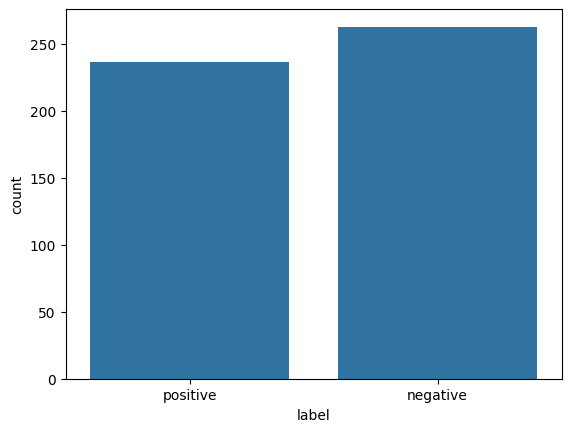

In [8]:
sns.countplot(x='label',data=dataset)

In [9]:
dataset.isna().sum()

review    0
label     0
dtype: int64

In [10]:
import spacy

nlp=spacy.load('en_core_web_sm')

In [11]:
import string
punct = string.punctuation

In [12]:
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
from spacy.lang.en.stop_words import STOP_WORDS
stopwords=list(STOP_WORDS)

In [14]:
stopwords


['take',
 'seem',
 'whereupon',
 'least',
 'full',
 'formerly',
 'are',
 'themselves',
 'both',
 'at',
 'us',
 'after',
 'hereby',
 'ten',
 'wherever',
 'may',
 'via',
 'whence',
 'top',
 'can',
 'is',
 'there',
 'nevertheless',
 'who',
 'our',
 'otherwise',
 'hereafter',
 'somehow',
 'along',
 'three',
 '’m',
 'yours',
 'ours',
 'front',
 '‘ve',
 'fifteen',
 "'re",
 'a',
 'above',
 'if',
 'six',
 'all',
 'anywhere',
 'why',
 'besides',
 'hereupon',
 'eleven',
 'by',
 'could',
 'first',
 "'m",
 'more',
 'very',
 'becoming',
 'what',
 'also',
 'this',
 'when',
 'under',
 'you',
 'did',
 '’ve',
 'however',
 'therefore',
 'nothing',
 'will',
 'me',
 'rather',
 '’ll',
 'must',
 'such',
 'that',
 'quite',
 'still',
 'becomes',
 'last',
 'done',
 'third',
 'back',
 'sixty',
 'afterwards',
 'anyhow',
 'for',
 'into',
 'move',
 'sometime',
 'one',
 'another',
 'somewhere',
 'call',
 'herein',
 'does',
 'within',
 'former',
 'they',
 'through',
 'whose',
 'five',
 'show',
 'seeming',
 'am',
 'e

In [15]:
len(stopwords)

326

In [16]:
def clean_data(text):
    doc=nlp(text)
    
    tokens = []
    for token in doc:
        if token.lemma_ != '-PRON-':
            temp = token.lemma_.lower().strip()
        else:
            temp=token.lemma_
        tokens.append(temp)
    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords and token not in punct:
            cleaned_tokens.append(token)

    return cleaned_tokens

In [17]:
x=dataset.iloc[:,0].values
y=dataset.iloc[:,1].values

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer =  TfidfVectorizer(tokenizer=clean_data)
x=vectorizer.fit_transform(x).toarray()

C:\Users\tejes\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [21]:
x.shape

(500, 11161)

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [23]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200)
classifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200)

In [31]:
y_pred = classifier.predict(x_test)

In [32]:
y_pred

array(['positive', 'positive', 'negative', 'negative', 'negative',
       'negative', 'positive', 'positive', 'positive', 'negative',
       'positive', 'positive', 'positive', 'positive', 'negative',
       'positive', 'negative', 'negative', 'negative', 'negative',
       'positive', 'positive', 'negative', 'negative', 'negative',
       'positive', 'negative', 'negative', 'negative', 'positive',
       'negative', 'positive', 'negative', 'positive', 'positive',
       'positive', 'positive', 'positive', 'positive', 'positive',
       'positive', 'positive', 'positive', 'negative', 'positive',
       'positive', 'negative', 'positive', 'negative', 'positive',
       'positive', 'negative', 'negative', 'positive', 'positive',
       'positive', 'negative', 'positive', 'positive', 'negative',
       'negative', 'positive', 'positive', 'positive', 'negative',
       'positive', 'negative', 'negative', 'positive', 'positive',
       'positive', 'positive', 'negative', 'positive', 'negati

<AxesSubplot: >

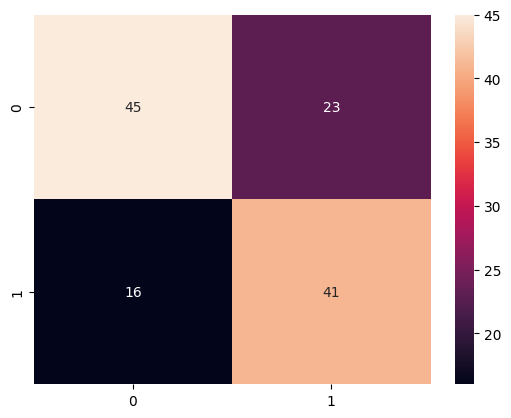

In [33]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [34]:
accuracy_score(y_test,y_pred)

0.688